In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import GridSearchCV
import pickle

In [44]:
df = pd.read_csv("dermatology_database_1.csv")
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [ ]:
#input output
class DataHandler:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.input_df = None
        self.output_df = None

    def load_data(self): 
        self.data = pd.read_csv(self.file_path)
        
    def create_input_output(self, target_column):
        self.output_df = self.data[target_column]
        self.input_df = self.data.drop(target_column, axis=1)

In [ ]:
file_path = 'dermatology_database_1.csv'
data_handler = DataHandler(file_path)
data_handler.load_data()
data_handler.create_input_output('class')
input_df = data_handler.input_df 
output_df = data_handler.output_df 

In [47]:
data_handler.input_df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,25
362,3,2,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,2,0,36
363,3,2,2,2,3,2,0,2,0,0,...,3,0,3,0,3,0,0,2,3,28
364,2,1,3,1,2,3,0,2,0,0,...,3,0,2,0,1,0,0,2,3,50


In [48]:
data_handler.output_df

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

In [ ]:
#Training and cleansing
class ModelHandler:
    def __init__(self, input_data, output_data):
        self.input_data = input_data
        self.output_data = output_data
        self.createModel() 
        self.x_train, self.x_test, self.y_train, self.y_test, self.y_predict = [None] * 5 
        
    def checkAgeOutlierWithBox(self, kolom):
        boxplot = self.x_train.boxplot(column=[kolom])
        plt.show()
        
    def createMeanFromColumn(self, kolom):
        return np.mean(self.x_train[kolom])
    
    def createModel(self, criteria = 'gini', maxdepth=6):
        self.model = RandomForestClassifier(criterion=criteria, max_depth=maxdepth)
        
    def DataConvertToNumeric(self, columns):
        self.x_train[columns] = pd.to_numeric(self.x_train[columns], errors = "coerce")
        self.x_test[columns] = pd.to_numeric(self.x_test[columns], errors = "coerce")

    def fillingNAWithNumbers(self, columns, number):
        self.x_train[columns].fillna(number, inplace=True)
        self.x_test[columns].fillna(number, inplace=True)

    def makePrediction(self):
        self.y_predict = self.model.predict(self.x_test)
        
    def createReport(self):
        print("\n Classification Report:\n")
        print(classification_report(self.y_test, self.y_predict, target_names=['1','2','3','4','5','6']))
        
    def split_data(self, test_size = 0.2, random_state=42):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            self.input_data, self.output_data, test_size=test_size, random_state=random_state
        )
        
    def train_model(self):
        self.model.fit(self.x_train, self.y_train)
    
    def evaluate_model(self):
        #predictions = self.model.predict(self.x_test)
        return accuracy_score(self.y_test, self.y_predict)
    
    def tuningParameter(self):
        parameters = {'criterion' : ['gini', 'entropy', 'log_loss'], 'max_depth' : [2,4,6,8]}
        RFClass = RandomForestClassifier()
        RFClass = GridSearchCV(RFClass, scoring='accuracy', param_grid=parameters, cv=5)
        
        RFClass.fit(self.x_train, self.y_train)
        
        print("Tuned HyperParameters ", RFClass.best_params_)
        print("Accuracy: ", RFClass.best_score_)
        
        self.createModel(criteria=RFClass.best_params_['criterion'], maxdepth=RFClass.best_params_['max_depth'])
        
    def save_model_to_file(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump(self.model, file)

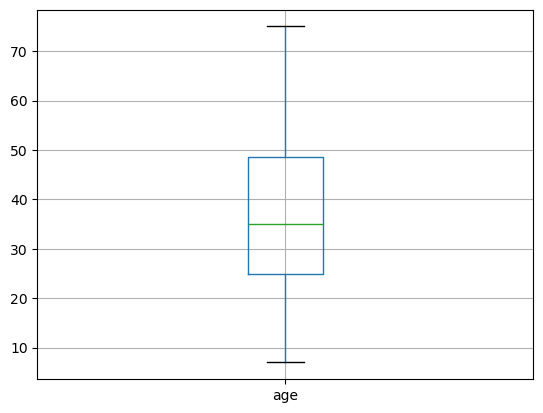

C:\Users\prk\AppData\Local\Temp\ipykernel_11584\1178205724.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.x_train[columns].fillna(number, inplace=True)
C:\Users\prk\AppData\Local\Temp\ipykernel_11584\1178205724.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [50]:
model_handler = ModelHandler(input_df, output_df)
model_handler.split_data()
model_handler.DataConvertToNumeric('age')

model_handler.checkAgeOutlierWithBox('age')

age_replace_na = model_handler.createMeanFromColumn('age')
model_handler.fillingNAWithNumbers('age', age_replace_na)

In [51]:
print("Before Tuning Parameter")
model_handler.train_model()
model_handler.makePrediction()
print("Model Accuracy: ", model_handler.evaluate_model())
model_handler.createReport()

print("After Tuning Parameter")
model_handler.tuningParameter()
model_handler.train_model()

print("Model Accuracy: ", model_handler.evaluate_model())
model_handler.makePrediction()
model_handler.createReport()
model_handler.save_model_to_file("trained_model.pkl")

Before Tuning Parameter
Model Accuracy:  0.9864864864864865

 Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74

After Tuning Parameter
Tuned HyperParameters  {'criterion': 'log_loss', 'max_depth': 4}
Accuracy:  0.9727060198714202
Model Accuracy:  0.9864864864864865

 Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00     